In [1]:
from data_analysis import data_analysis

In [7]:
class project():
    def __init__(self):
        self.data = data_analysis()

    def gerar_dfnormalizado(self):
        df = self.data.read_file()
        df = self.data.log_valores(df)
        df = self.data.gerar_dummies(df) 

        self.data.plot_boxplot(df)
        self.data.plot_histograma(df)

        df = df.drop(['frequencia', 'recencia_valor', 'valor/freq'], axis=1)  
        df = df.replace({True: 1, False:0})
        return df     
    
    def gerar_indices(self):
        df = self.gerar_dfnormalizado()
        df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = self.data.fracionar_df(df)
        # df_alimentar = self.data.indice_RFV(df_alimentar)
        # df_ecommerce = self.data.indice_RFV(df_ecommerce)
        # df_hospitalar = self.data.indice_RFV(df_hospitalar)
        # df_varejo_direto = self.data.indice_RFV(df_varejo_direto)
        # df_varejo_indireto = self.data.indice_RFV(df_varejo_indireto)
        return df, df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto

    def kmeans_run(self, df, k):
        df = self.data.kmeans_method(df, k)
        self.data.plotar_3d(df)
        # self.data.plotar_3d_2(df)
        return df
    

In [8]:
run = project()

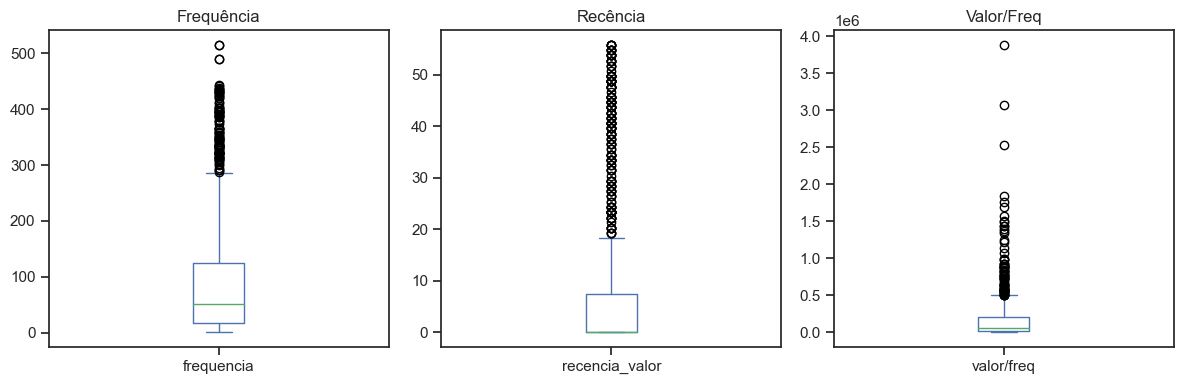

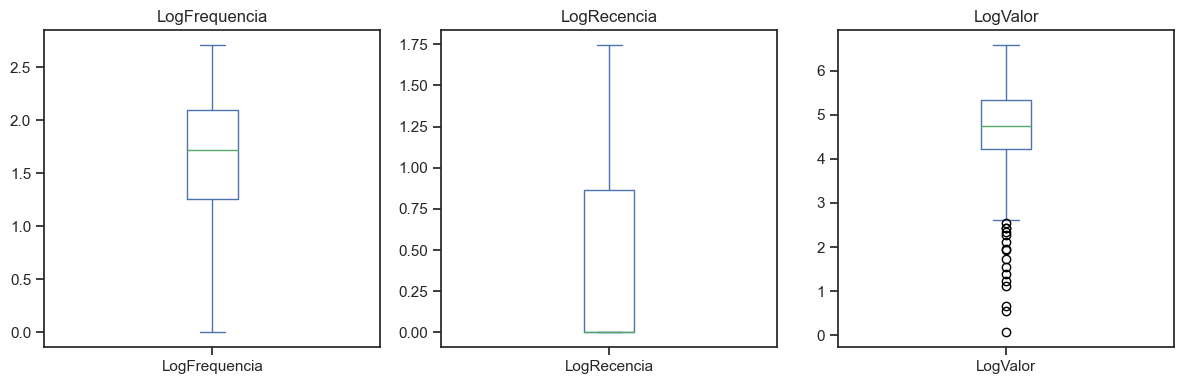

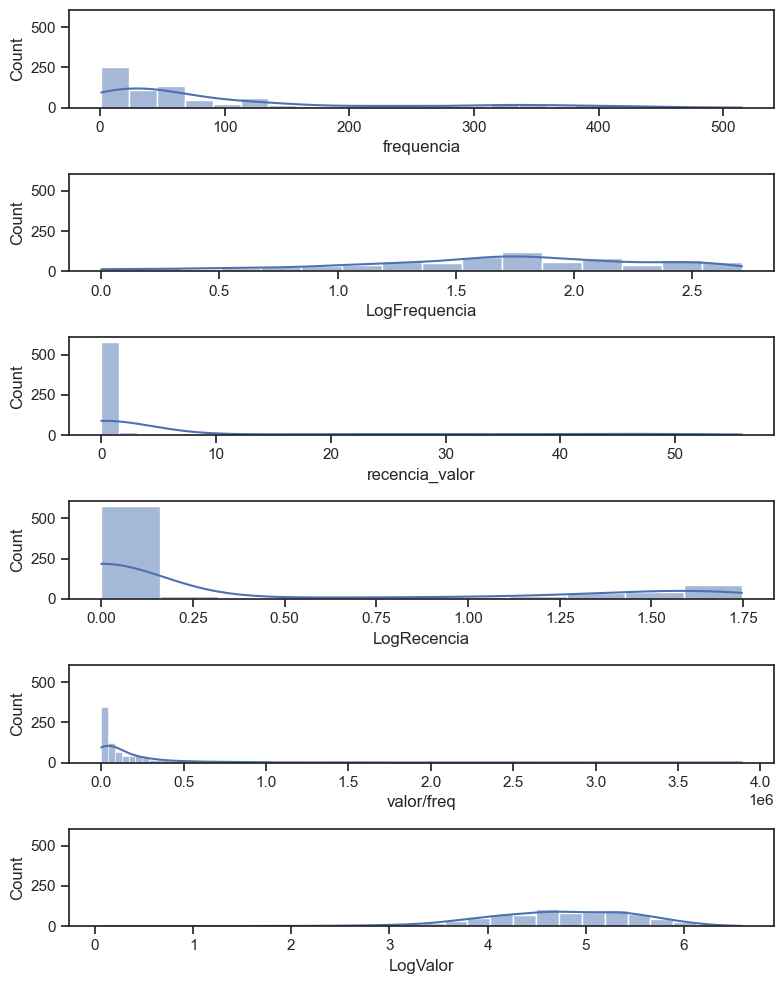

In [9]:
df, df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = run.gerar_indices()

Geral


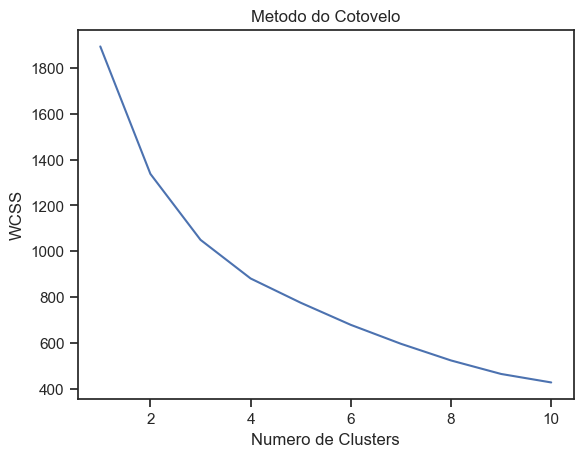

Score do coefiente de Silhueta: 0.41110154322299136


Alimentar


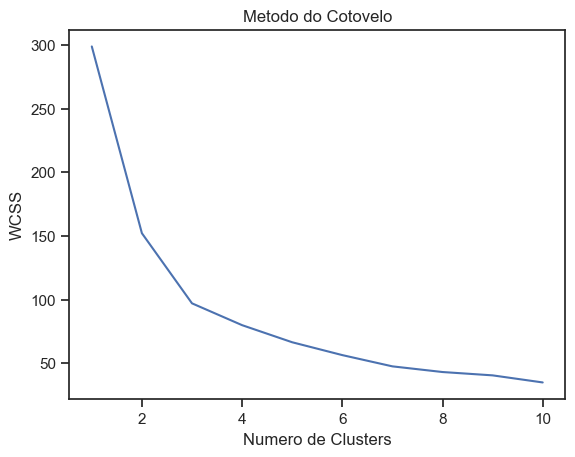

Score do coefiente de Silhueta: 0.6719007977270034


E-Commerce


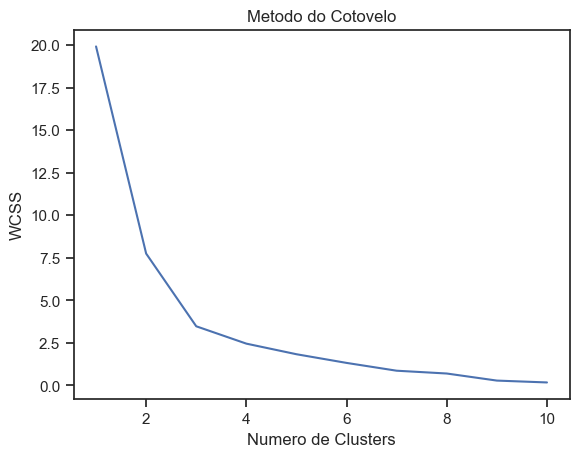

Score do coefiente de Silhueta: 0.6312473598161467


Hospitalar


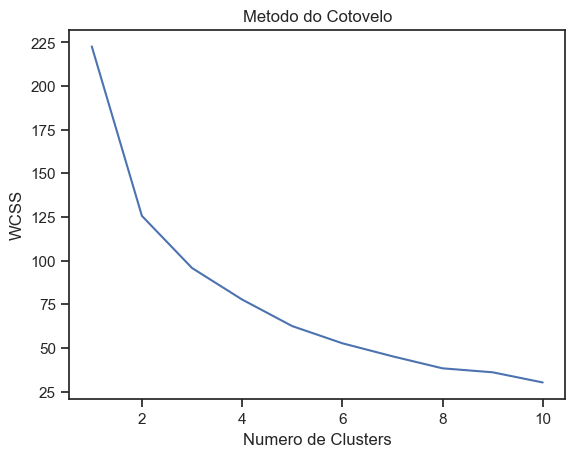

Score do coefiente de Silhueta: 0.5251228360655458


Venda Direto


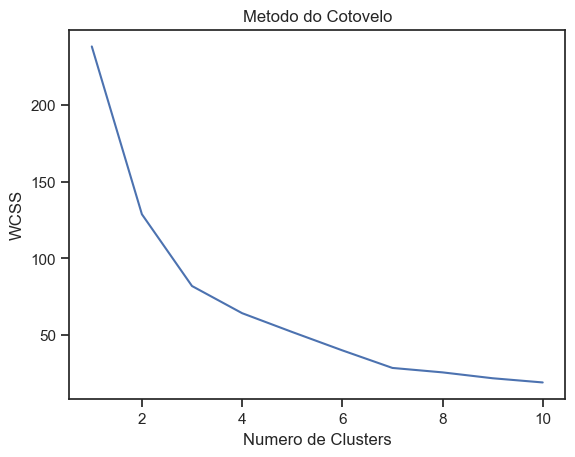

Score do coefiente de Silhueta: 0.5261259174094957


Venda Indireto


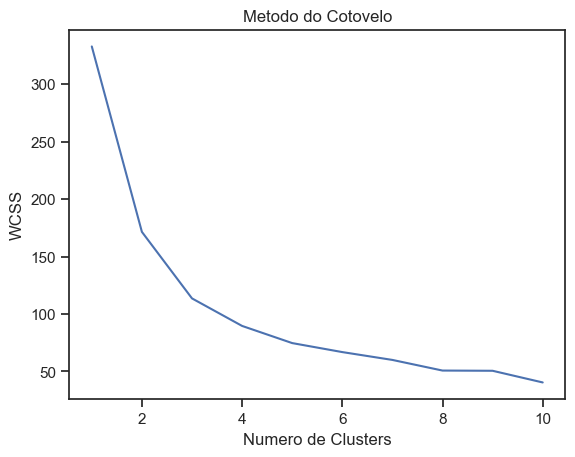

Score do coefiente de Silhueta: 0.6509099290128937


In [10]:
print("Geral")
df_kmeans = run.kmeans_run(df, 4)
print("Alimentar")
df_kmeans_a = run.kmeans_run(df_alimentar, 3)
print("E-Commerce")
df_kmeans_ec = run.kmeans_run(df_ecommerce, 3)
print("Hospitalar")
df_kmeans_hosp = run.kmeans_run(df_hospitalar, 3)
print("Venda Direto")
df_kmeans_vd = run.kmeans_run(df_varejo_direto, 3)
print("Venda Indireto")
df_kmeans_vi = run.kmeans_run(df_varejo_indireto, 3)
